# <span style="color:red">Rapport mondial du bonheur</span>

Rédigé par Pierre de La Ruffie et Mathieu Guérin, basé sur les données du World Happiness Report par Gallup World Poll, aggrégées par années par Ajaypal Singh (https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021, les métadatas du dataset : https://happiness-report.s3.amazonaws.com/2022/Appendix_1_StatiscalAppendix_Ch2.pdf).

### <span style="color:green">Life Ladder :</span>

Il s'agit d'une mesure du bien-être subjectif. Le rapport du 18 février 2022 signé par le GWP couvrant de 2005 à 2021 correspond à la moyenne nationale de réponse à la question d'évaluation du niveau de vie. La version en anglais est : "Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possibe life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time ?". On appelle également cette mesure l'échelle de Cantril.


### <span style="color:green">Log GDP (Gross Domestic Product) per capita (in purchasing power parity):</span> 

Il s'agit du logarithme du PIB par habitants en parité de pouvoir d'achat en dollar (dollar constant fixé à 2017), venant du rapport du World Development Indicator du 16 décembre 2021.

Il peut être intéressant de noter que les PIBs de l'année 2021 n'étant pas encore disponible, des données ont dû être extrapolées en ce basnat sur des prévisions spécifiques à chaque pays ainsi que sur des rapports de l'OECD et du WBGEP.


### <span style="color:green">Social Support :</span>

Il s'agit de la mesure de la moyenne nationale à la question binaire (0 ou 1) : "If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not".

### <span style="color:green">Healthy Life expectancy at birth :</span>

Espérance de vie calculée sur les données extraites du repo de l'OMS Global Health Observatory à la granularité de 5 années, ensuite extrapolées pour correspondre au dataset.


### <span style="color:green">Freedom to make life choice :</span>

Il s'agit de la mesure de la moyenne nationale à la question "Are you satisfied or dissatisfied with your freedom to choose what you do with your life ?"

### <span style="color:green">Generosity :</span>

Il s'agit de la mesure de la moyenne nationale à la question "Have you donated mo,ey to charity in the mast month ?". Cependant la donnée n'est pas basée sur la moyenne simple mais est le résidu d'une régression linéaire, c'est à dire qu'une valeur positive veut dire qu'il y a eu plus de générosité que ce à quoi on s'attendait, et une valeur négative veut dire moins que ce à quoi on s'attendait.

### <span style="color:green">Perceptions of corruption :</span>

Il s'agit de la mesure de la moyenne nationale aux questions :
- "Is corruption widespread throughout the government or not"
- "Is corruption widespread within businesses or not ?"
En resulte la moyenne des deux réponses binaires (On peut noter qu'on utilise la perception de la corruption privée quand la perception de la corruption publique est manquante (certains pays n'apprécient pas de parler de corruption publique)).

### <span style="color:green">Positive affect :</span>

L'effet positif est définit par la moyenne des questions binaires suivantes :
- "Did you smile or laugh a lot yerterday ?"
- "Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Enjoyment ?"
- "Did you learn or do something interesting yesterday ?"


### <span style="color:green">Negative affect :</span>

L'effet positif est définit par la moyenne des questions binaires suivantes :
- "Did you experience the following feelings during A LOT OF THE DAY yesterday ? How about Worry ?"
- "Did you experience the following feelings during A LOT OF THE DAY yesterday ? How about Sadness ?"
- "Did you experience the following feelings during A LOT OF THE DAY yesterday ? How about Anger ?"


<span style="color:blue">*Notes du compte rendu avec la professeur : Le but est vraiment de correler les informations pour faire un rendu dynamique qui puisse montrer des comportements, des modèles qu'on ne peut pas remarquer simplement en regardant le tableau (comportements linéaires etc). Le danger est donc également de trop s'éparpiller (surtout avec le dataset conséquent qu'on a) et de traiter le sujet sur beaucoup d'axes différents mais toujours à moitié. On pourrait par exemple chercher quels indicateurs sont proportionnels au bonheur ressentis du pays, ou les aggréger en fonction des continents, des langues parlées etc...*</span>

In [40]:
# IMPORTS NECESSAIRES
import pandas as pd
import matplotlib.cm as colormap
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# FONCTION DE CONSTRUCTION DU DATASET
def _build_dataframe_from_csv(filename):
    df = pd.read_csv(filename, sep=",", encoding="UTF-8")
    return df

In [64]:
df = _build_dataframe_from_csv("data/Hapiness-Report.csv")
columns_en = ["Country name","year","Life Ladder","Log GDP per capita",
              "Social support","Healthy life expectancy at birth","Freedom to make life choices",
              "Generosity","Perceptions of corruption,Positive affect","Negative affect"]
columns_fr = ["Pays", "Année", "Echelle de vie", "log PIB par habitant", "Support social",
              "Espérance de vie", "Liberté de vivre", "Générosité", "Perception de la corruption", "Effets positifs", "Effets négatifs"]
df.columns = columns_fr

display(df)

,Pays,Année,Echelle de vie,log PIB par habitant,Support social,Espérance de vie,Liberté de vivre,Générosité,Perception de la corruption,Effets positifs,Effets négatifs
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


Année,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Pays,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,3.724,4.402,4.758,3.832,3.783,3.572,3.131,3.983,4.220,2.662,2.694,2.375,NaN
Albania,NaN,NaN,4.634,NaN,5.485,5.269,5.867,5.510,4.551,4.814,4.607,4.511,4.640,5.004,4.995,5.365
Algeria,NaN,NaN,NaN,NaN,NaN,5.464,5.317,5.605,NaN,6.355,NaN,5.341,5.249,5.043,4.745,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,5.589,4.360,3.937,3.795,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,NaN,6.313,6.073,5.961,6.424,6.441,6.776,6.468,6.582,6.671,6.697,6.427,6.039,5.793,6.086,5.901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,7.17,6.525,NaN,6.258,7.189,7.478,6.580,7.067,6.553,6.136,5.569,4.041,5.071,5.006,5.081,4.574
Vietnam,NaN,5.294,5.422,5.480,5.304,5.296,5.767,5.535,5.023,5.085,5.076,5.062,5.175,5.296,5.467,NaN
Yemen,NaN,NaN,4.477,NaN,4.809,4.350,3.746,4.061,4.218,3.968,2.983,3.826,3.254,3.058,4.197,NaN


<AxesSubplot:title={'center':"Données de l'Algérie avec interpolation"}, xlabel='Année'>

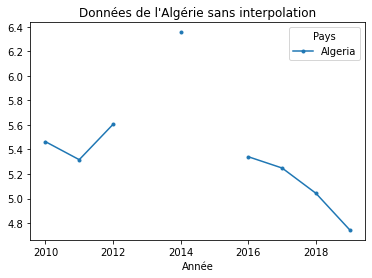

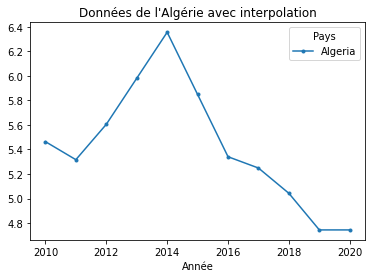

In [63]:
years = df["Année"].unique()

# CREER UN NOUVEAU DF AVEC LES PAYS EN INDEX, LES ANNEES EN COLONNES ET LA GENEROSITE EN VALEUR
dfpivot = df.pivot(index = "Pays", columns = "Année", values = "Echelle de vie")
display(dfpivot)

# PLOT LES VALEURS POUR L'ALGERIE' UNIQUEMENT
dfpivot.transpose()[["Algeria"]].plot(style='.-', title="Données de l'Algérie sans interpolation")
# INTERPOLATE PERMET DE COMBLER LES VALEURS MANQUANTES PAR INTERPOLATION
dfpivot.transpose()[["Algeria"]].interpolate(method='linear').plot(
    style='.-',
    title = "Données de l'Algérie avec interpolation")

#df.aggregate(func = lambda x: x.isna().sum(), axis = 0).sort_values(ascending = True).plot(kind = 'bar', width=0.9, title = "Abscence de données dans le dataset")

<AxesSubplot:xlabel='Pays'>

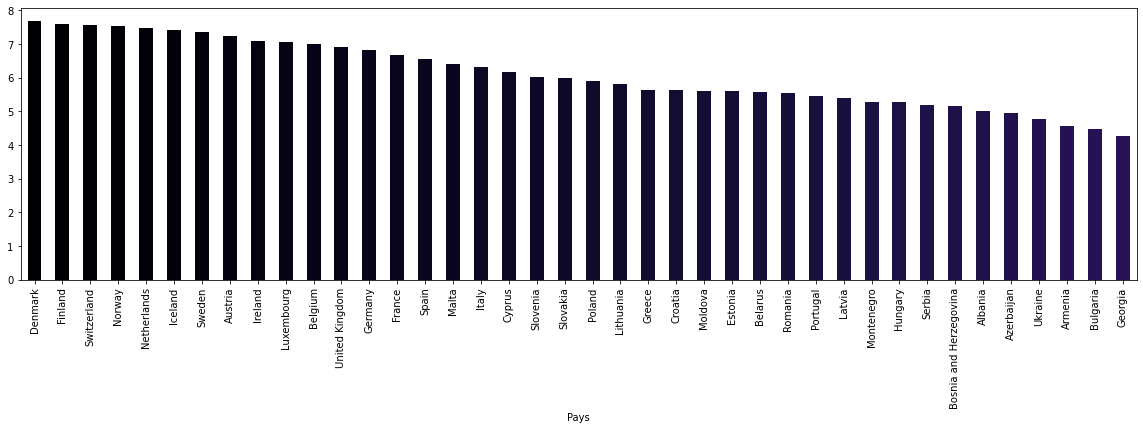

In [57]:
# RECUPERE LE DATASET COUNTRIES CONTINENT ET CREER UNE ENUM ASSOCIEE
countries_continents_df = _build_dataframe_from_csv("data/Countries-Continents.csv")
countries_continents_df.columns = ["Continent", "Pays"]
countries_continents_df.set_index("Pays", inplace = True)

from enum import Enum
class Continent(Enum):
    AF = "Africa"
    AS = "Asia"
    EU = "Europe"
    NA = "North America"
    OC = "Oceania"
    SA = "South America"
# Continent["AF"].value => "Africa" <good>
# Continent["AF"] => Continent.AF    <bad>
    
# ON RECUPERE LA LISTE DES PAYS DU CONTINENT
continentId = 'EU'
continent = list(set(countries_continents_df[countries_continents_df["Continent"] == Continent[continentId].value].index.values) & set(dfpivot.index.values))
#dfpivot.loc[continent].transpose().interpolate('linear').plot(figsize = (20, 20))

# ON RECUPERE LES MOYENNES DE 2005 A 2020 POUR CHAQUE PAYS DU CONTINENT DANS L'ORDRE
# Utiliser des couleurs ne sert pas à grand chose, on va probablement plutot utiliser express de plotly
my_cmap = plt.get_cmap("magma")

dfpivot.loc[continent].transpose().interpolate('linear').mean().sort_values(ascending = False).plot(kind = 'bar', legend=False, figsize = (20, 5), color=my_cmap.colors)

<AxesSubplot:title={'center':'PIB allemands'}, xlabel='Année'>

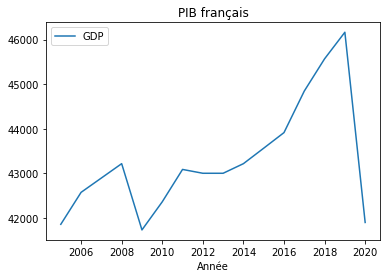

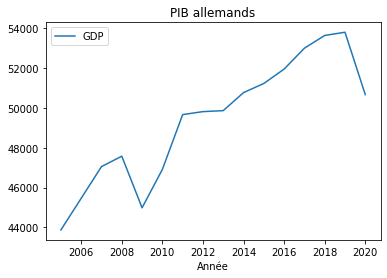

In [59]:
from math import log as log
from math import exp as exp
from math import trunc as trunc


# Log PIB -> PIB
df["GDP"] = df.apply(lambda x: round(exp(x["log PIB par habitant"]),2), axis=1)
pibfr = df[df["Pays"] == "France"][["Année", "GDP"]]
pibde = df[df["Pays"] == "Germany"][["Année", "GDP"]]

# Display du PIB de la france et de l'allemagne
pibfr.plot(x = "Année", y = "GDP", title = "PIB français")
pibde.plot(x = "Année", y = "GDP", title = "PIB allemands")